Links:
https://www.w3schools.com/python/python_ml_multiple_regression.asp


In [1]:
#Import dependencies
import pandas as pd
from sklearn import linear_model 
from pathlib import Path
import matplotlib.pyplot as plt
import sqlalchemy.ext 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func
from sqlalchemy.orm import Session
from sqlalchemy import text
from sklearn.model_selection import train_test_split

In [2]:
# Read in the data from the SQLite database in the repository

#Read data and create dataframe

filtered_df = pd.read_csv("Resources/filtered_df.csv")
#filtered_df

# Create a SQLite database engine
engine = create_engine('sqlite:///filtered_df.sqlite')

# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

# Write DataFrame to SQLite database
filtered_df.to_sql('realtor_filtered', con=engine, if_exists='replace', index=False)

# Confirm the data has been written by querying the database
query = "SELECT * FROM realtor_filtered;"  # Example query
with engine.connect() as conn:
    result = conn.execute(text(query))

In [3]:
# Run only if running the cell above

df = result
df = pd.DataFrame(df)
df

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
0,for_sale,180000.0,2.0,1.0,0.34,Agawam,Massachusetts,1001.0,676.0,None
1,for_sale,239900.0,3.0,1.0,0.46,Agawam,Massachusetts,1001.0,1196.0,None
2,for_sale,525000.0,3.0,3.0,0.45,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
3,for_sale,289900.0,3.0,2.0,0.36,Agawam,Massachusetts,1001.0,1276.0,2012-10-12
4,for_sale,275000.0,4.0,2.0,0.11,Agawam,Massachusetts,1001.0,1732.0,None
...,...,...,...,...,...,...,...,...,...,...
1353428,sold,359900.0,4.0,2.0,0.33,Richland,Washington,99354.0,3600.0,2022-03-25
1353429,sold,350000.0,3.0,2.0,0.10,Richland,Washington,99354.0,1616.0,2022-03-25
1353430,sold,440000.0,6.0,3.0,0.50,Richland,Washington,99354.0,3200.0,2022-03-24
1353431,sold,179900.0,2.0,1.0,0.09,Richland,Washington,99354.0,933.0,2022-03-24


In [5]:
# if using Google Colab, connect to Google Drive to import the dataset (dataset needs to be saved to Google Drive)# use 
#df = pd.read_csv('drive/My Drive/clean_realestate_data.csv')

In [6]:
# reorder the columns
df2 = df[[ 'bed', 'bath','acre_lot','zip_code','house_size', 'price']]
df2.head()

,bed,bath,acre_lot,zip_code,house_size,price
0,2.0,1.0,0.34,1001.0,676.0,180000.0
1,3.0,1.0,0.46,1001.0,1196.0,239900.0
2,3.0,3.0,0.45,1001.0,2314.0,525000.0
3,3.0,2.0,0.36,1001.0,1276.0,289900.0
4,4.0,2.0,0.11,1001.0,1732.0,275000.0


In [7]:
# Set the features and the target
X = df2.iloc[:,0:5].values  
y = df2.iloc[:,5].values  

In [8]:
regr = linear_model.LinearRegression()
regr.fit(X, y) 

LinearRegression()

In [10]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
 
# Making predictions on the same data or new data
predictions = regr.predict(X)
 
# Evaluating the model
mae = mean_absolute_error(y, predictions)
print(f'Absolute Error: {mae}')

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Absolute Error: 340712.30050060805
Mean Squared Error: 1237138329237.3142
R-squared: 0.16553802950667196


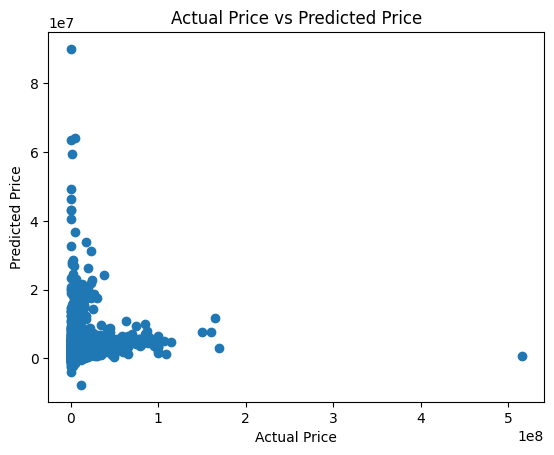

In [11]:
plt.scatter(y, predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [12]:
rslt_df = df[[ 'bed', 'bath','acre_lot','zip_code','house_size', 'price']]

In [13]:
# remove some of the rows that contain outliers
rslt_df=rslt_df[(rslt_df['price'] < 1200000) & (rslt_df['bed'] < 6) & (rslt_df['bath'] < 6) & (rslt_df['acre_lot'] < 0.5) & (rslt_df['house_size'] < 4000)]

In [14]:
rslt_df.head()

,bed,bath,acre_lot,zip_code,house_size,price
0,2.0,1.0,0.34,1001.0,676.0,180000.0
1,3.0,1.0,0.46,1001.0,1196.0,239900.0
2,3.0,3.0,0.45,1001.0,2314.0,525000.0
3,3.0,2.0,0.36,1001.0,1276.0,289900.0
4,4.0,2.0,0.11,1001.0,1732.0,275000.0


In [15]:
# Set the features and the target
X2 = rslt_df.iloc[:,0:5].values  
y2 = rslt_df.iloc[:,5].values  

In [16]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.4, random_state=42)

In [17]:
regr = linear_model.LinearRegression()
#regr.fit(X2, y2) 
regr.fit(X_train, y_train)

LinearRegression()

In [20]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
 
# Making predictions on the same data or new data
predictions2 = regr.predict(X_train)
 
# Evaluating the model
mae2 = mean_absolute_error(y_train, predictions2)
print(f'Absolute Error: {mae2}')

mse2 = mean_squared_error(y_train, predictions2)
print(f'Mean Squared Error: {mse2}')
 
r22 = r2_score(y_train, predictions2)
print(f'R-squared: {r22}')

Absolute Error: 144283.55479200394
Mean Squared Error: 36995744289.026566
R-squared: 0.2979622507434674


In [21]:
# Making predictions on the same data or new data
predictions3 = regr.predict(X_test)
 
# Evaluating the model
mae3 = mean_absolute_error(y_test, predictions3)
print(f'Absolute Error: {mae3}')

mse3 = mean_squared_error(y_test, predictions3)
print(f'Mean Squared Error: {mse3}')
 
r23 = r2_score(y_test, predictions3)
print(f'R-squared: {r23}')

Absolute Error: 143819.1603645207
Mean Squared Error: 36707162847.133354
R-squared: 0.30077751948944986


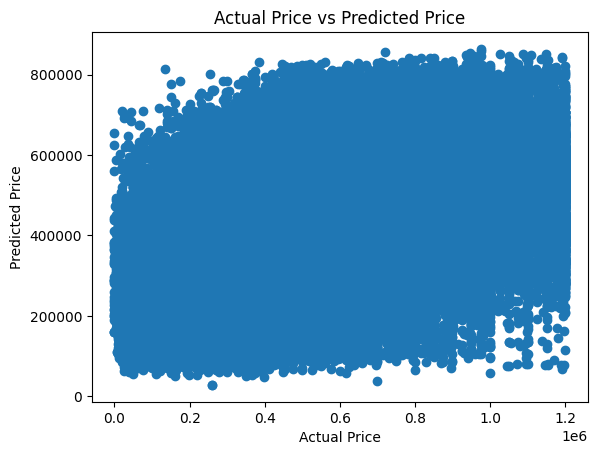

In [22]:
plt.scatter(y_train, predictions2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()